In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.ticker as mticker

## Logistic Regression Exercise

**Part 1: Load and explore**

1. Load the dataset and display the first few rows.  

In [2]:
movies = pd.read_csv('../data/movies.csv')
movies.head(3)

,Title,Year,Vote_Average,Vote_Count,Budget,Revenue,TMDB_ID,Nominee,Winner,Genre_Action,...,Genre_History,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_TV Movie,Genre_Thriller,Genre_War,Genre_Western
0,#Alive,2020,7.228,1956,6300000,13416285,614696,0,0,True,...,False,True,False,False,False,True,False,False,False,False
1,10 Cloverfield Lane,2016,6.994,8359,15000000,110216998,333371,0,0,False,...,False,True,False,False,False,True,False,True,False,False
2,12 Strong,2018,6.346,3097,35000000,67450815,429351,0,0,True,...,True,False,False,False,False,False,False,False,True,False


2. How many movies in the dataset were nominated for Best Picture?  

In [3]:
movies['Nominee'].value_counts()

Nominee
0    914
1     91
Name: count, dtype: int64

In [4]:
def count_nominated_movies(movies):
    count = (movies['Nominee'] == 1).sum()
    return count

print(f'{count_nominated_movies(movies)} movies were nominated.')

91 movies were nominated.


In [5]:
nominated_movies = movies.loc[movies['Nominee'] == 1]
not_nominated_movies = movies.loc[movies['Nominee'] == 0]

3. What percentage of movies were nominated?  

In [6]:
#there are 1005 movies in the DataFrame
print(f'{(91/1005)*100}% of movies were nominated.')

9.054726368159203% of movies were nominated.


4. Compute the average revenue for:  
    * nominated movies  
    * non-nominated movies  
Does revenue look associated with nominations?

In [7]:
print(f' Nominated movies made an average revnue of ${nominated_movies['Revenue'].mean()}')

 Nominated movies made an average revnue of $232573777.25274727


In [8]:
print(f' Non-nominated movies made an average revnue of ${not_nominated_movies['Revenue'].mean()}')

 Non-nominated movies made an average revnue of $189624332.38402626


This makes revenue look associated with movie nomination status.

**Part 2: Logistic Regression: Revenue Only**

5. Fit a logistic regression model for whether a movie was nominated based on its revenue.  

In [9]:
#target is nominee and our predictor is revenue
nominee_logreg = smf.logit('Nominee ~ Revenue',
                           data = movies).fit()

Optimization terminated successfully.
         Current function value: 0.303106
         Iterations 6


6. Interpret the sign of the coefficient for Revenue.  

In [10]:
nominee_logreg.params

Intercept   -2.385659e+00
Revenue      3.752031e-10
dtype: float64

7. Use the model to estimate the probability of nomination for a movie with $10M revenue, $100M revenue, and $500M revenue.  

In [11]:
def logistic(x):
    return 1 / (1 + np.exp(-x))

In [12]:
Dollars = 10000000

logit_p = nominee_logreg.params['Intercept'] + nominee_logreg.params['Revenue']*Dollars

print(f'If a movies has a revenue of $10 million, then the estimated probability nomination is {logistic(logit_p)*100}%')

If a movies has a revenue of $10 million, then the estimated probability nomination is 8.456283924639596%


In [13]:
Dollars = 100000000

logit_p = nominee_logreg.params['Intercept'] + nominee_logreg.params['Revenue']*Dollars

print(f'If a movies has a revenue of $100 million, then the estimated probability nomination is {logistic(logit_p)*100}%')

If a movies has a revenue of $100 million, then the estimated probability nomination is 8.721384640957922%


In [14]:
Dollars = 500000000

logit_p = nominee_logreg.params['Intercept'] + nominee_logreg.params['Revenue']*Dollars

print(f'If a movies has a revenue of $500 million, then the estimated probability nomination is {logistic(logit_p)*100}%')

If a movies has a revenue of $500 million, then the estimated probability nomination is 9.992508312035362%


8. Make a plot of predicted probability vs. revenue.

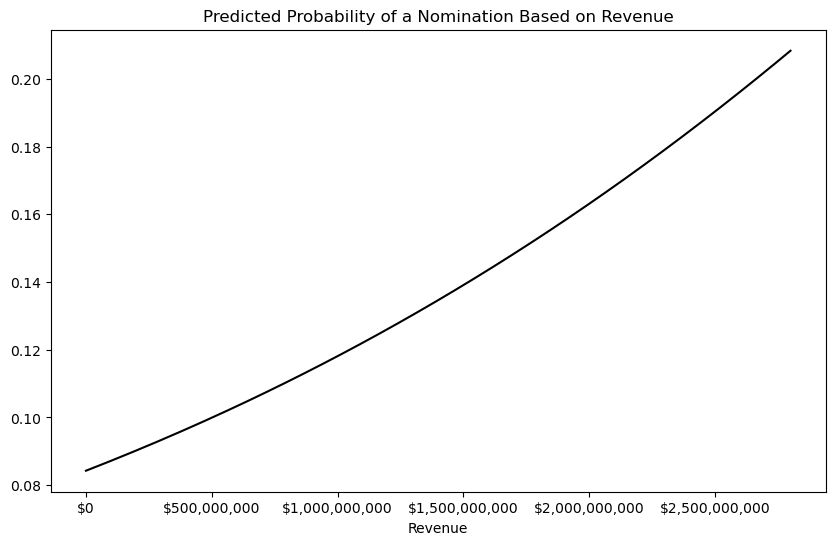

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))

fit_df = pd.DataFrame({
    'Revenue': np.linspace(start=movies['Revenue'].min(),
                          stop=movies['Revenue'].max(),
                          num=150)
})

formatter = mticker.StrMethodFormatter('${x:,.0f}')
ax.xaxis.set_major_formatter(formatter)

fit_df['fit'] = nominee_logreg.predict(fit_df)

fit_df.plot(x='Revenue',
           y='fit',
           legend=False,
           ax=ax,  # Pass the axis object to the plot
           color='black',
           title='Predicted Probability of a Nomination Based on Revenue')

plt.show() 

**Part 3: Add Genre**

9. Fit a model for whether a movie was nominated based on its revenue and whether or not it is a drama.  

In [16]:
#target is nominee and our predictor is revenue
genre_logreg = smf.logit('Nominee ~ Revenue + Genre_Drama',
                           data = movies).fit()

Optimization terminated successfully.
         Current function value: 0.234564
         Iterations 8


10. Interpret the coefficient for Genre_Drama. 

In [20]:
genre_logreg.params

Intercept             -4.783568e+00
Genre_Drama[T.True]    3.340881e+00
Revenue                1.727152e-09
dtype: float64

If the genre was Drama, then there is a positive correlation between revenue and nonmination status. 

11. Using your final model, compute the predicted probabilities of nominations for:  
    * $20M non-drama
    * $20M drama
    * $300M non-drama
    * $300M drama  

In [32]:
Dollars = 20000000

logit_p = genre_logreg.params['Intercept'] + genre_logreg.params['Revenue']*Dollars + genre_logreg.params['Genre_Drama[T.True]']*0 
#multiply by 0 because it is looking for non-nominated movies

print(f'If a movie was not Drama and made $20 million, then the estimated probability nomination is {logistic(logit_p)*100}%')

If a movie was not Drama and made $20 million, then the estimated probability nomination is 0.8585781585731622%


In [33]:
Dollars = 20000000

logit_p = genre_logreg.params['Intercept'] + genre_logreg.params['Revenue']*Dollars + genre_logreg.params['Genre_Drama[T.True]']*1 
#multiply by 1 because it is looking for nominated movies

print(f'If a movie was a Drama and made $20 million, then the estimated probability nomination is {logistic(logit_p)*100}%')

If a movie was a Drama and made $20 million, then the estimated probability nomination is 19.652697723676248%


In [34]:
Dollars = 300000000

logit_p = genre_logreg.params['Intercept'] + genre_logreg.params['Revenue']*Dollars + genre_logreg.params['Genre_Drama[T.True]']*0 
#multiply by 0 because it is looking for non-nominated movies

print(f'If a movie was not Drama and made $300 million, then the estimated probability nomination is {logistic(logit_p)*100}%')

If a movie was not Drama and made $300 million, then the estimated probability nomination is 1.38513783436991%


In [35]:
Dollars = 300000000

logit_p = genre_logreg.params['Intercept'] + genre_logreg.params['Revenue']*Dollars + genre_logreg.params['Genre_Drama[T.True]']*1 
#multiply by 1 because it is looking for nominated movies

print(f'If a movie was a Drama and made $300 million, then the estimated probability nomination is {logistic(logit_p)*100}%')

If a movie was a Drama and made $300 million, then the estimated probability nomination is 28.403347111987593%


12. Which variable has the larger effect: being a drama or revenue?

We can gather that the Drama Genre has a larger effect than Revenue on nomination status.

**Part 4: Stretch Questions**  

13. How do the empirical and estimated probabilities look for the revenue-only model? What about the model that uses both revenue and the drama genre?    

14. Revenue is highly skewed, which means that log revenue might make for a better model fit. Try fitting a model using log revenue. Then compare these models. You can look at [Akaike Information Criterion](https://en.wikipedia.org/wiki/Akaike_information_criterion) or the [log-likelihood](https://en.wikipedia.org/wiki/Likelihood_function). You might also look at a [calibration curve](https://encord.com/glossary/calibration-curve/).  

15. Add other genres to your model. Which genres have the largest effect on the estimated probability of being nominated?  

16. Instead of revenue, use profit. How does this change the model?